# MNIST dimensionality reduction

In [31]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import numpy as np

RANDOM_STATE = 42


Exercise: _Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing)._

In [2]:
X_mnist, y_mnist = fetch_openml(
    "mnist_784", return_X_y=True, as_frame=False, parser="auto"
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=10000, random_state=RANDOM_STATE)
print(len(X_train))
print(len(X_test))

60000
10000


Exercise: _Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set._

In [ ]:
random_forest_clf = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest_clf.fit(X_train, y_train)

CPU times: user 41.6 s, sys: 176 ms, total: 41.8 s
Wall time: 41.5 s


RandomForestClassifier(random_state=42)

In [9]:
y_predictions = random_forest_clf.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Exercise: _Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%._

In [11]:
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [12]:
X_train_reduced = pca.transform(X_train)
print(f"Before: {X_train.shape[1]} columns")
print(f"After: {X_train_reduced.shape[1]} columns")

Before: 784 columns
After: 154 columns


Exercise: _Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?_

In [ ]:
random_forest_clf_reduced = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest_clf_reduced.fit(X_train_reduced, y_train)

CPU times: user 1min 46s, sys: 137 ms, total: 1min 46s
Wall time: 1min 46s


RandomForestClassifier(random_state=42)

Actually it took more than twice as long.

Exercise: _Next evaluate the classifier on the test set: how does it compare to the previous classifier?_

In [15]:
X_test_reduced = pca.transform(X_test)
print(f"Before: {X_test.shape[1]} columns")
print(f"After: {X_test_reduced.shape[1]} columns")

Before: 784 columns
After: 154 columns


In [16]:
y_predictions = random_forest_clf_reduced.predict(X_test_reduced)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       983
           1       0.97      0.98      0.98      1152
           2       0.94      0.96      0.95       967
           3       0.92      0.94      0.93      1034
           4       0.93      0.95      0.94       906
           5       0.95      0.94      0.94       937
           6       0.96      0.97      0.97       961
           7       0.96      0.96      0.96      1055
           8       0.94      0.90      0.92       969
           9       0.95      0.92      0.93      1036

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Accuracy is slightly worse (from 0.97 to 0.95).

Exercise: _Try again with an `SGDClassifier`. How much does PCA help now?_

In [18]:
sgd_clf = SGDClassifier(random_state=RANDOM_STATE)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [19]:
y_predictions = sgd_clf.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       983
           1       0.95      0.98      0.96      1152
           2       0.96      0.72      0.82       967
           3       0.86      0.79      0.82      1034
           4       0.87      0.93      0.90       906
           5       0.66      0.92      0.77       937
           6       0.94      0.90      0.92       961
           7       0.94      0.89      0.92      1055
           8       0.75      0.80      0.77       969
           9       0.91      0.81      0.85      1036

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [20]:
sgd_clf_reduced = SGDClassifier(random_state=RANDOM_STATE)
sgd_clf_reduced.fit(X_train_reduced, y_train)

SGDClassifier(random_state=42)

In [21]:
y_predictions = sgd_clf_reduced.predict(X_test_reduced)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.94      0.95      0.94      1152
           2       0.88      0.91      0.89       967
           3       0.86      0.89      0.88      1034
           4       0.88      0.92      0.90       906
           5       0.91      0.80      0.85       937
           6       0.90      0.94      0.92       961
           7       0.86      0.94      0.90      1055
           8       0.87      0.78      0.82       969
           9       0.84      0.82      0.83      1036

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Exercise: _Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class._

In [28]:
X_train_sampled = X_train[:5000]
y_train_sampled = y_train[:5000]

In [26]:
tsne = TSNE(
    random_state=RANDOM_STATE,
    n_components=2,
    learning_rate="auto",
    init="random",
    n_jobs=-1
)

X_test_reduced_tsne = tsne.fit_transform(X_train_sampled[:5000])

CPU times: user 40.8 s, sys: 1.95 ms, total: 40.9 s
Wall time: 39 s


In [33]:
X_test_reduced_tsne.shape

(5000, 2)

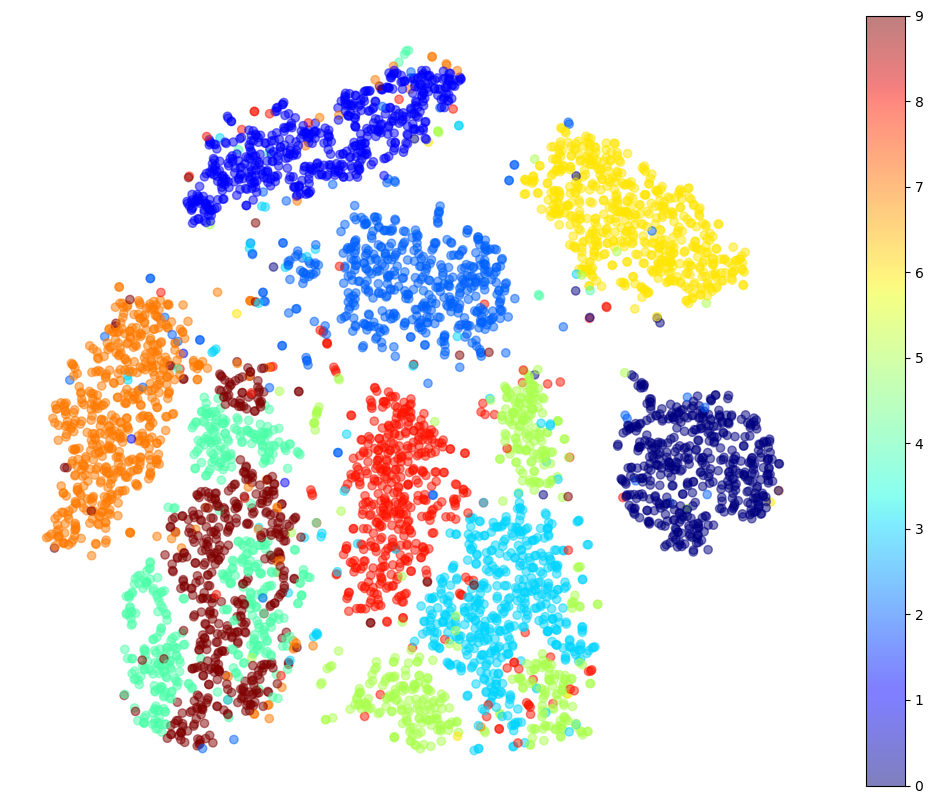

In [32]:
plt.figure(figsize=(13, 10))
plt.scatter(X_test_reduced_tsne[:, 0], X_test_reduced_tsne[:, 1],
            c=y_train_sampled.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

Exercise: _Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits._

In [ ]:
# Just check solution

Exercise: _Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations._

In [ ]:
# Just check solution